# Use Customer_Segmentation Notebook Template

In [1]:
import numpy as np # linear algebra
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Matplotlib created a temporary cache directory at /tmp/matplotlib-9r16q4l2 because the default path (/home/mosaic-ai/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


# Read data from Snowflake CUSTOMER_TRANSACTION_MASTER using fosforio sdk

In [2]:
from fosforio import snowflake

Connection manager service url initialised to http://fdc-project-manager:80/project-manager
If you need to update its value then update the variable CONNECTION_MANAGER_BASE_URL in os env.


In [3]:
# To get snowflake connection object with a default snowflake connection created by the user, if available.
#snowflake.get_connection()

# To get snowflake connection object with a specific connection name
snowflake.get_connection(connection_name="FDC_Insurance_Snowflake")

Exception occurred in getting snowflake connection: 'connectionSources'


In [12]:
# To read a specific dataset published from a snowflake connection
df = snowflake.get_dataframe("CUSTOMER_TRANSACTION_MASTER")

In [13]:
df.shape

(122882, 27)

In [14]:
df.tail()

,CUSTOMER_ID,DATE,AGE,SEX,EDUCATION_LEVEL,EMPLOYMENT_STATUS,HOBBIES,MARITAL_STATUS,DEPENDENTS,REGISTRATION_DATE,...,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
122877,3a7ce3d5-0f4b-4575-badc-3553f5440c92,2023-05-01,32,MALE,High School,Unemployed,reading,Single,One Dependent,2020-03-12,...,684.4068,305.7313,339.07230,Very high,Low,Very high,21.20,273.352691,242.288921,0.0
122878,e2a8f308-57eb-4f55-bc13-399378f246d3,2022-12-01,27,MALE,PhD,Unemployed,camping,Single,One Dependent,2009-05-12,...,535.0963,0.0000,482.58685,Very high,Very low,Very high,25.92,474.722440,165.534652,0.0
122879,599c0e61-9bbc-4e14-bbfd-b07f5a398669,2022-12-01,33,FEMALE,High School,Unemployed,video-games,Single,One Dependent,2007-02-12,...,0.0000,0.0000,0.00000,Very low,Very low,Very low,0.00,568.542708,549.300475,0.0
122880,77298902-f899-4c3e-9104-06d1736fb089,2023-06-01,33,FEMALE,College,Unemployed,basketball,Single,One Dependent,2001-02-12,...,0.0000,0.0000,0.00000,Very low,Very low,Very low,0.00,517.588408,544.214360,0.0
122881,cd75294e-c31f-41b3-b78c-1d3e7322ddcf,2022-12-01,44,FEMALE,High School,Employed,exercise,Married,Two Dependents,2001-02-12,...,0.0000,0.0000,0.00000,Very low,Very low,Very low,0.00,1029.696570,1552.899035,0.0


In [15]:
to_drop = ['CUSTOMER_ID','DATE','AGE','SEX','EDUCATION_LEVEL','EMPLOYMENT_STATUS','HOBBIES','MARITAL_STATUS','BANK_ACCOUNT_TYPE',
 'DEPENDENTS','REGISTRATION_DATE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','BALANCE_FREQUENCY']

In [16]:
df.drop(to_drop, axis= 1, inplace= True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122882 entries, 0 to 122881
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BALANCE                 122882 non-null  float64
 1   CREDIT_LIMIT            122882 non-null  float64
 2   CASH_ADVANCE            122882 non-null  float64
 3   CASH_ADVANCE_FREQUENCY  122882 non-null  float64
 4   CASH_ADVANCE_TRX        122882 non-null  float64
 5   PURCHASES               122882 non-null  float64
 6   ONEOFF_PURCHASES        122882 non-null  float64
 7   INSTALLMENTS_PURCHASES  122882 non-null  float64
 8   PURCHASES_TRX           122882 non-null  float64
 9   PAYMENTS                122882 non-null  float64
 10  MINIMUM_PAYMENTS        122882 non-null  float64
 11  PRC_FULL_PAYMENT        122882 non-null  float64
dtypes: float64(12)
memory usage: 11.3 MB


# ELBOW Method

In [9]:
from sklearn.cluster import KMeans
from sklearn. metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [18]:
scaler= StandardScaler()
scaled_data= scaler.fit_transform(df)

In [20]:
df.shape

(122882, 12)

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df.shape

(122882, 12)

In [23]:
k= range(2,9)
inertia_values= []
silhoutte_scores= []

for i in k:
    print(f'Trying KMean clusttering for k= {i}')
    kmean= KMeans(n_clusters= i, random_state= 42)
    kmean.fit(scaled_data)
    inertia_values.append(kmean.inertia_)
    
    sil_score= silhouette_score(scaled_data, kmean.labels_)
    silhoutte_scores.append(sil_score)

Trying KMean clusttering for k= 2
Trying KMean clusttering for k= 3
Trying KMean clusttering for k= 4
Trying KMean clusttering for k= 5
Trying KMean clusttering for k= 6
Trying KMean clusttering for k= 7
Trying KMean clusttering for k= 8


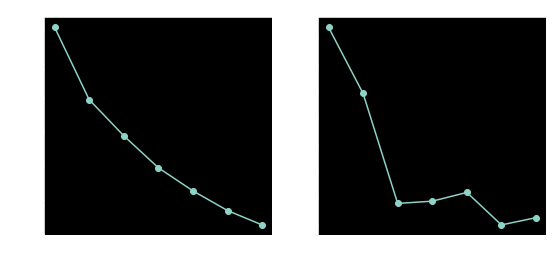

In [24]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(9,4))
    plt.title("Elbow Method")

    plt.subplot(1,2,1)
    plt.plot(k, inertia_values, marker= 'o', linestyle= '-')
    plt.xlabel("No of clusters (K)")
    plt.ylabel("Inertia")

    plt.subplot(1,2,2)
    plt.plot(k, silhoutte_scores, marker= 'o', linestyle= '-')
    plt.xlabel("No of clusters (K)")
    plt.ylabel("Silhouette Score")

    plt.show()

##### From the given visualization, we can take the value of k to be 2. But we will use KElbowVisualizer as well for determining value of k. 

### KElbowVisualizer

     |████████████████████████████████| 286kB 4.0MB/s eta 0:00:01
     |████████████████████████████████| 17.3MB 9.6MB/s eta 0:00:01
     |████████████████████████████████| 11.1MB 85.1MB/s eta 0:00:01
     |████████████████████████████████| 9.2MB 93.3MB/s eta 0:00:01
     |████████████████████████████████| 34.5MB 91.3MB/s eta 0:00:01
     |████████████████████████████████| 307kB 88.7MB/s eta 0:00:01
     |████████████████████████████████| 4.7MB 89.9MB/s eta 0:00:01
     |████████████████████████████████| 4.4MB 61.0MB/s eta 0:00:01
     |████████████████████████████████| 112kB 93.4MB/s eta 0:00:01
     |████████████████████████████████| 307kB 92.3MB/s eta 0:00:01
     |████████████████████████████████| 1.2MB 87.6MB/s eta 0:00:01
     |████████████████████████████████| 61kB 86.0MB/s eta 0:00:01
     |████████████████████████████████| 235kB 87.3MB/s eta 0:00:01
ERROR: mosaic-utils 1.0.2 has requirement scikit-learn==1.2.1; python_version >= "3.8", but you'll have scikit-learn 1.3.2 which 

You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
from yellowbrick.cluster import KElbowVisualizer

Matplotlib created a temporary cache directory at /tmp/matplotlib-ora03vp2 because the default path (/home/mosaic-ai/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
plt.figure(figsize=(8,5))
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,9))

visualizer.fit(scaled_data)   
visualizer.show()      

NameError: name 'plt' is not defined

### Now we take value of K=?

In [ ]:
k= 4

kmean= KMeans(n_clusters=k, random_state= 42)
kmean.fit(scaled_data)

In [ ]:
df['Group']= kmean.labels_

In [ ]:
df.drop(['Group'], axis= 1).hist(figsize= (15,15))

In [ ]:
i= df.drop(['Group'], axis= 1).corr()
plt.figure(figsize= (14,14))
sns.heatmap(i, annot= True)
plt.show()

### PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn. preprocessing import StandardScaler

In [ ]:
pca= PCA()
pca.fit(scaled_data)

In [ ]:
ex_var= pca.explained_variance_ratio_

In [ ]:
plt.plot(np.cumsum(ex_var), marker='*')
plt.xlim(0,7,1)
plt.xlabel('No of components')
plt.ylabel('Cummulative Explained Variance')
plt.show()

In [ ]:
var_exp= pca.explained_variance_
l= len(var_exp)

In [ ]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6,4))
    
    plt.bar(range(l), var_exp, alpha= 0.5, align= 'center', label= 'Individual Explained Variance')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.legend(loc= 'best')
    plt.show()

### Here the first 2 components show maximum variance

In [ ]:
pca= PCA(n_components= 2)
df_new= pd.DataFrame(pca.fit_transform(scaled_data))
df_new['Group']= df['Group']

In [ ]:
df_new.isnull().sum()

In [ ]:
df_new= df_new.dropna()

In [ ]:
df_new.columns= ['PC1','PC2','Group']

In [ ]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,8))
    sns.scatterplot(x="PC1",y="PC2",hue="Group",data=df_new,palette='flare')
    plt.title("Groups Visualization")
    plt.show()

### Visualization

In [ ]:
plt.figure(figsize= (6,3))
sns.barplot(x= 'Group', y= 'PC1', data= df_new)
plt.ylabel("PC1")
plt.show()

In [ ]:
plt.figure(figsize= (6,3))
sns.barplot(x= 'Group', y= 'PC2', data= df_new)
plt.ylabel("PC2")
plt.show()

In [ ]:
plt.figure(figsize=(6,3))
sns.countplot(x='Group', data=df_new, palette= 'flare')

In [ ]:
for c in df.drop(['Group'], axis=1).columns:
    plt.figure(figsize=(6, 3))
    sns.violinplot(x='Group', y=c, data=df, palette='deep')
    plt.show()